In [131]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plot
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np

In [132]:
creditcard = pd.read_csv('cleanData.csv')
creditcard.columns = [x.lower() for x in creditcard.columns]
creditcard.rename(columns = {'class' : 'fraud'}, inplace = True)
creditcard

,unnamed: 0,time,v1,v2,v3,v4,v5,v6,v7,v9,...,v10_,v11_,v12_,v14_,v16_,v17_,v18_,v19_,v21_,normal
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,...,0,0,0,0,0,0,0,0,0,1.0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,...,0,0,0,0,0,0,0,0,0,1.0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,...,0,0,0,0,1,0,0,0,0,1.0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,...,0,0,0,0,0,0,0,0,0,1.0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,...,0,0,0,0,0,0,0,0,0,1.0
5,5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,-0.568671,...,0,0,0,0,0,0,0,0,0,1.0
6,6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.464960,...,0,0,0,0,0,0,0,0,0,1.0
7,7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,0.615375,...,0,0,0,0,0,0,0,0,1,1.0
8,8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,-0.392048,...,0,0,0,0,0,0,0,0,0,1.0
9,9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,-0.736727,...,0,0,0,0,0,0,0,0,0,1.0


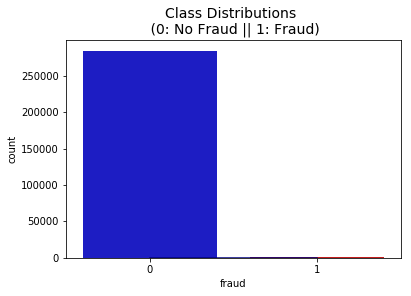

In [133]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('fraud', data= creditcard, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [134]:
creditcard.fraud.value_counts(dropna = False)

0    284315
1       492
Name: fraud, dtype: int64

In [135]:
creditcard.groupby('fraud').amount.mean()

fraud
0     88.291022
1    122.211321
Name: amount, dtype: float64

In [136]:
creditcard.drop('time' , axis = 1, inplace = True)

In [137]:
scaler = StandardScaler()
creditcard['amount'] = scaler.fit_transform(creditcard['amount'].values.reshape(-1,1))

In [138]:
X = creditcard.iloc[:,:-1]
y = creditcard.iloc[:, -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = .30, stratify = y, random_state = 1)

In [139]:
clf = DecisionTreeClassifier()
clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [140]:
import pydotplus
dot_data = export_graphviz(clf, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("DT.pdf")

True

In [141]:
y_train_pred = clf.predict(Xtrain)
y_test_pred = clf.predict(Xtest)

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
confusion_matrix(Ytrain, y_train_pred)

array([[   344,      0],
       [     0, 199020]], dtype=int64)

In [144]:
confusion_matrix(Ytest, y_test_pred)

array([[  148,     0],
       [    0, 85295]], dtype=int64)

In [145]:
from sklearn.metrics import classification_report
from  sklearn.metrics import precision_recall_fscore_support


def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['avg / total'] = avg

    return class_report_df.T

In [146]:
print(classification_report(y_true=Ytest, y_pred=y_test_pred, digits=6))

             precision    recall  f1-score   support

        0.0   1.000000  1.000000  1.000000       148
        1.0   1.000000  1.000000  1.000000     85295

avg / total   1.000000  1.000000  1.000000     85443



In [147]:
df_class_report = pandas_classification_report(y_true=Ytest, y_pred=y_test_pred)
print(df_class_report)
df_class_report.to_csv('classDT.csv',  sep=',')

             precision  recall  f1-score  support
0                  1.0     1.0       1.0    148.0
1                  1.0     1.0       1.0  85295.0
avg / total        1.0     1.0       1.0  85443.0


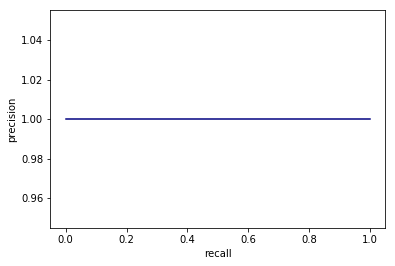

In [148]:
y_test_pred = clf.predict_proba(Xtest)
precision, recall, thresholds = precision_recall_curve(Ytest, y_test_pred[:,1])
plot.plot(recall, precision, color='navy', label='Precision-Recall curve')
plot.ylabel('precision')
plot.xlabel('recall')
plot.show()

In [62]:
df = pd.DataFrame({'Class':y_test_pred, 'MerchantCategoryCode' : Xtest['v1'] ,'TransactionTime' : Xtest['v2'],
                  'Transactionstatus' : Xtest['v3'], 'TransactionPlace' : Xtest['v4'], 'TransactionType' : Xtest['v5'],
                  'customeridentification' : Xtest['v6'], 'BANK' : Xtest['v7']})
df.head()

,Class,MerchantCategoryCode,TransactionTime,Transactionstatus,TransactionPlace,TransactionType,customeridentification,BANK
66801,1.0,-2.909812,-3.404169,-0.829321,-2.948892,-2.563923,0.522455,4.757710
9092,1.0,-1.004757,1.721504,2.341700,3.284606,-0.721372,0.128643,-0.099067
79338,1.0,1.300914,-0.839638,1.299015,-0.417759,-1.662955,-0.133736,-1.243236
174467,1.0,-0.926559,1.448724,-0.127940,-0.059352,0.969562,0.318426,1.440326
114997,1.0,1.179364,0.225292,0.710701,0.695135,-0.541547,-0.824388,0.004873


In [63]:
clf.score(Xtest,Ytest)

1.0

In [64]:
clf.score(Xtrain,Ytrain)

1.0

In [65]:
def getMerchantCategoryCode(float):
    if float >= 2.5:
        return "MERC1"
    elif float >= 2 and float < 2.5:
        return "MERC2"
    elif float >= 2 and float < 2.5:
        return "MERC3"
    elif float >= 1.5 and float < 2:
        return "MERC4"
    elif float >= 1 and float < 1.5:
        return "MERC5"
    elif float >= 0 and float < 1:
        return "MERC6"
    elif float >= -1 and float < 0:
        return "MERC7"
    elif float >= -2 and float < -1:
        return "MERC8"
    else:
        return "MERC9"
        
df['MerchantCategoryCode'] = df['MerchantCategoryCode'].apply(getMerchantCategoryCode)
print(df['MerchantCategoryCode'])

66801     MERC9
9092      MERC8
79338     MERC5
174467    MERC7
114997    MERC5
115926    MERC8
84970     MERC5
99713     MERC7
220332    MERC6
168801    MERC2
39130     MERC7
250920    MERC4
104106    MERC8
229952    MERC8
253855    MERC8
9276      MERC8
193371    MERC7
162675    MERC4
283539    MERC6
60116     MERC5
243688    MERC7
247598    MERC8
189847    MERC4
172784    MERC4
166280    MERC4
41818     MERC7
156543    MERC7
141477    MERC8
272062    MERC6
77248     MERC6
          ...  
260687    MERC7
18947     MERC6
180664    MERC8
241531    MERC4
179195    MERC2
182211    MERC2
158260    MERC6
234911    MERC7
247018    MERC9
101879    MERC7
195845    MERC9
279459    MERC4
182449    MERC2
267641    MERC7
261466    MERC7
94178     MERC9
194358    MERC2
59673     MERC8
53513     MERC8
181345    MERC2
76027     MERC5
57202     MERC8
23141     MERC6
18638     MERC5
8153      MERC5
74750     MERC5
116776    MERC4
271975    MERC9
6447      MERC6
64493     MERC8
Name: MerchantCategoryCo

In [66]:
import math
def getTransactionTime(float):
    return (float) * (float)
    
        
df['TransactionTime'] = df['TransactionTime'].apply(getTransactionTime)
print(df['TransactionTime'])

66801     11.588367
9092       2.963576
79338      0.704992
174467     2.098801
114997     0.050757
115926     0.537595
84970      0.050918
99713      3.072876
220332     0.639523
168801     0.030884
39130      0.658021
250920     1.735750
104106     0.268809
229952     0.020383
253855     0.238734
9276       2.505251
193371     0.330835
162675     2.455819
283539     0.025562
60116      1.877127
243688     0.116462
247598     0.640288
189847     0.805468
172784     3.302411
166280     0.007344
41818      1.299305
156543     0.624269
141477     0.002301
272062     0.515673
77248      3.596677
            ...    
260687     0.557035
18947      0.854149
180664     1.643455
241531     0.036585
179195     2.357251
182211     0.000340
158260     1.219969
234911     0.054051
247018     4.842797
101879     1.593491
195845    79.761932
279459     0.773932
182449     0.624660
267641     0.801291
261466     1.379169
94178      9.044967
194358     0.364148
59673      1.852312
53513      0.954432


In [67]:
def getTransactionstatus(float):
    if float >= 0:
        return "Success"
    elif float >= 0.9 and float < 0:
        return "Still_Processsing"
    else:
        return "Failure"
        
df['Transactionstatus'] = df['Transactionstatus'].apply(getTransactionstatus)
print(df['Transactionstatus'])

66801     Failure
9092      Success
79338     Success
174467    Failure
114997    Success
115926    Success
84970     Success
99713     Success
220332    Success
168801    Failure
39130     Failure
250920    Failure
104106    Success
229952    Failure
253855    Failure
9276      Success
193371    Failure
162675    Failure
283539    Success
60116     Success
243688    Failure
247598    Success
189847    Failure
172784    Failure
166280    Failure
41818     Success
156543    Success
141477    Success
272062    Failure
77248     Success
           ...   
260687    Success
18947     Failure
180664    Failure
241531    Failure
179195    Failure
182211    Failure
158260    Success
234911    Failure
247018    Success
101879    Success
195845    Failure
279459    Failure
182449    Failure
267641    Failure
261466    Failure
94178     Failure
194358    Failure
59673     Success
53513     Success
181345    Failure
76027     Success
57202     Success
23141     Success
18638     Success
8153      

In [68]:
def getTransactionPlace(float):
    if float >= 2.5:
        return "Delhi"
    elif float >= 2 and float < 2.5:
        return "Lucknow"
    elif float >= 2 and float < 2.5:
        return "Hyderabad"
    elif float >= 1.5 and float < 2:
        return "Chennai"
    elif float >= 1 and float < 1.5:
        return "Banglore"
    elif float >= 0 and float < 1:
        return "Kerela"
    elif float >= -1 and float < 0:
        return "Sikkim"
    elif float >= -2 and float < -1:
        return "J&K"
    else:
        return "Punjab"
        
df['TransactionPlace'] = df['TransactionPlace'].apply(getTransactionPlace)
print(df['TransactionPlace'])

66801       Punjab
9092         Delhi
79338       Sikkim
174467      Sikkim
114997      Kerela
115926     Chennai
84970       Sikkim
99713     Banglore
220332      Sikkim
168801      Sikkim
39130       Sikkim
250920      Sikkim
104106     Chennai
229952      Sikkim
253855         J&K
9276      Banglore
193371         J&K
162675         J&K
283539      Sikkim
60116          J&K
243688      Sikkim
247598         J&K
189847    Banglore
172784      Sikkim
166280      Kerela
41818       Kerela
156543      Sikkim
141477      Sikkim
272062         J&K
77248          J&K
            ...   
260687      Sikkim
18947       Kerela
180664      Sikkim
241531    Banglore
179195         J&K
182211      Kerela
158260      Sikkim
234911      Kerela
247018      Sikkim
101879      Sikkim
195845      Sikkim
279459      Kerela
182449         J&K
267641      Punjab
261466      Sikkim
94178       Kerela
194358      Kerela
59673          J&K
53513       Kerela
181345      Kerela
76027       Punjab
57202       

In [69]:
def getTransactionType(float):
    if float >= 2.5:
        return "PayPal"
    elif float >= 2 and float < 2.5:
        return "Paytm"
    elif float >= 2 and float < 2.5:
        return "Mobiquik"
    elif float >= 1.5 and float < 2:
        return "CreditCard"
    elif float >= 1 and float < 1.5:
        return "DebitCard"
    elif float >= 0 and float < 1:
        return "EWallet"
    elif float >= -1 and float < 0:
        return "NetBanking"
    elif float >= -2 and float < -1:
        return "EBanking"
    else:
        return "AmazonPay"
        
df['TransactionType'] = df['TransactionType'].apply(getTransactionType)
print(df['TransactionType'])

66801      AmazonPay
9092      NetBanking
79338       EBanking
174467       EWallet
114997    NetBanking
115926      EBanking
84970     NetBanking
99713        EWallet
220332       EWallet
168801        PayPal
39130         PayPal
250920      EBanking
104106       EWallet
229952     AmazonPay
253855      EBanking
9276         EWallet
193371         Paytm
162675     DebitCard
283539       EWallet
60116       EBanking
243688         Paytm
247598    NetBanking
189847    NetBanking
172784      EBanking
166280       EWallet
41818        EWallet
156543    NetBanking
141477     DebitCard
272062        PayPal
77248       EBanking
             ...    
260687    CreditCard
18947     CreditCard
180664    NetBanking
241531       EWallet
179195      EBanking
182211       EWallet
158260       EWallet
234911        PayPal
247018      EBanking
101879       EWallet
195845     AmazonPay
279459    NetBanking
182449    NetBanking
267641     DebitCard
261466       EWallet
94178        EWallet
194358       

In [70]:
def getcustomeridentification(float):
    if float >= 2.5:
        return math.floor(float * 2.5)
    elif float >= 2 and float < 2.5:
        return math.floor(float * 2)
    elif float >= 2 and float < 2.5:
        return math.floor(float * 1)
    elif float >= 1.5 and float < 2:
        return math.floor(float * 3)
    elif float >= 1 and float < 1.5:
        return math.floor(float * 5)
    elif float >= 0 and float < 1:
        return math.floor(float * 7)
    elif float >= -1 and float < 0:
        return math.floor(float * 9)
    elif float >= -2 and float < -1:
        return math.floor(float * 6)
    else:
        return math.floor(float * 1.1)
        
df['customeridentification'] = df['customeridentification'].apply(getcustomeridentification)
print(df['customeridentification'])

66801      3
9092       0
79338     -2
174467     2
114997    -8
115926     7
84970     -4
99713     -7
220332    -7
168801     7
39130      8
250920    -9
104106    -8
229952     5
253855     5
9276       3
193371    -9
162675     9
283539     2
60116     -4
243688     5
247598    -7
189847    -2
172784     0
166280    -9
41818     -5
156543    -3
141477   -11
272062     8
77248      6
          ..
260687    -5
18947      5
180664    -7
241531     4
179195    -7
182211    -8
158260    -4
234911    -9
247018    -6
101879     3
195845     8
279459     5
182449    -5
267641    -2
261466     0
94178     -7
194358   -11
59673     -1
53513      5
181345    -8
76027      0
57202      0
23141     -6
18638     -2
8153      -3
74750     -7
116776    -3
271975    -7
6447       9
64493     -2
Name: customeridentification, Length: 85443, dtype: int64


In [71]:
def getBANK(float):
    if float >= 2.5:
        return "Federal"
    elif float >= 2 and float < 2.5:
        return "HDFC"
    elif float >= 2 and float < 2.5:
        return "BOB"
    elif float >= 1.5 and float < 2:
        return "BOI"
    elif float >= 1 and float < 1.5:
        return "SBI"
    elif float >= 0 and float < 1:
        return "Corporation"
    elif float >= -1 and float < 0:
        return "PNB"
    elif float >= -2 and float < -1:
        return "Canara"
    else:
        return "ICICI"
        
df['BANK'] = df['BANK'].apply(getBANK)
print(df['BANK'])

66801         Federal
9092              PNB
79338          Canara
174467            SBI
114997    Corporation
115926            PNB
84970             PNB
99713     Corporation
220332    Corporation
168801            PNB
39130     Corporation
250920    Corporation
104106    Corporation
229952        Federal
253855    Corporation
9276           Canara
193371            SBI
162675         Canara
283539    Corporation
60116          Canara
243688            SBI
247598    Corporation
189847            PNB
172784         Canara
166280    Corporation
41818     Corporation
156543    Corporation
141477    Corporation
272062    Corporation
77248          Canara
             ...     
260687    Corporation
18947     Corporation
180664    Corporation
241531            PNB
179195         Canara
182211    Corporation
158260    Corporation
234911    Corporation
247018            PNB
101879    Corporation
195845        Federal
279459            PNB
182449            PNB
267641    Corporation
261466    

In [72]:
df_class_report.to_csv('ReportDT.csv',  sep=',')

In [26]:
df.to_csv("Predict_DT.csv")